In [26]:
import matplotlib.pyplot as plt


In [1]:
import pymongo
import pandas as pd
from pymongo import MongoClient
client = MongoClient()
db = client.capstone_1_db
collection = db.good_reads_collections
data = pd.DataFrame(list(collection.find()))

In [8]:
data

,_id,author,birth_country,current_readers,language,ratings_number,title
0,5c64589c13218a20ad311a4e,Jane Austen,England,110625,English,2513940,Pride and Prejudice
1,5c64589d13218a20ad311a4f,Margaret Atwood,Canada,92600,English,1015611,The Handmaid's Tale
2,5c64589e13218a20ad311a50,J.K. Rowling,United Kingdom,86256,English,5766110,Harry Potter and the Sorcerer's Stone
3,5c64589f13218a20ad311a51,George R.R. Martin,United States,85450,English,1703982,A Game of Thrones
4,5c6458a013218a20ad311a52,George Orwell,India,78516,English,2509232,1984


In [13]:
data_split = data[["birth_country", "current_readers"]]

In [24]:
summed_data = data_split.groupby(["birth_country"]).sum()
summed_data

,current_readers
birth_country,
Australia,52676
Brazil,37412
Canada,92600
China,34742
England,150876
France,67235
French Republic,34481
India,78516
Ireland,79341


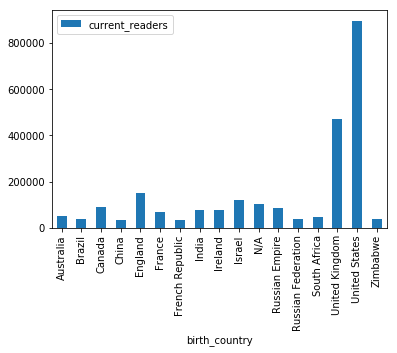

In [30]:
summed_data.plot.bar()

In [6]:
pd.read_csv("../goodreads_demographics.csv", delimiter = ";")

,count,avg_books_added,name
0,2156121,37.52,United States
1,117395,6.29,Iran
2,110294,8.74,Indonesia
3,84157,1.05,Thailand
4,83403,35.16,Canada
5,75785,31.50,United Kingdom
6,58556,8.05,India
7,44902,27.90,Australia
8,29908,11.20,Philippines
9,24244,8.91,Egypt


# Maps! But for Later!

In [21]:
# Make a data frame with dots to show on the map
data = pd.DataFrame({
   'lat':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
   'lon':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
   'name':['Buenos Aires', 'Paris', 'melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador'],
   'value':[10,12,40,70,23,43,100,43]
})
data
 
# Make an empty map
m = folium.Map(location=[20,0], tiles="Mapbox Bright", zoom_start=2)

"""
# I can add marker one by one on the map
for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['lon'], data.iloc[i]['lat']],
      popup=data.iloc[i]['name'],
      radius=data.iloc[i]['value']*10000,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
""" 
# Save it as html
m.save('mymap.html')


In [22]:
m